In [7]:
package eVehicle_LogicalArchitecture {   

    import SI::*;        
    
    attribute def WheelSize {
        size : LengthValue;
        deviation : LengthValue;        
    }
        
    part def Wheel :> ShapeItems::CircularCylinder {
        :>> radius = sizeOfWheel.size;
        attribute sizeOfWheel : WheelSize {
            :>> size := 325 [mm];
            :>> deviation := 1 [mm];
        }
        
        constraint pressureConstraint : WheelPressureConstraint {
            in currentPressure = pressure;
            in limitPressure = maxPressure;
        }

        attribute pressure : PressureValue;
        attribute maxPressure : PressureValue;
    }
    
    part def FrontWheel :> Wheel {
        attribute redefines maxPressure = 200000 [Pa];
    }
    part def RearWheel :> Wheel {
        attribute redefines maxPressure = 200000 [Pa];
    }
    
    constraint def WheelPressureConstraint {
        in currentPressure : PressureValue;
        in limitPressure : PressureValue;
        currentPressure <= limitPressure
    }
    
    part eVehicle {
        part body;
        part battery;
        part engine;
        part frontAxis;
        part rearAxis;
        part frontWheel : FrontWheel[2];
        part frontLeftWheel :> frontWheel {
            redefines pressure = 100000 [Pa];
        }
        part frontRightWheel :> frontWheel {
            redefines pressure = 100000 [Pa];
        }

        part rearWheel : RearWheel[2];
        part rearLeftWheel :> rearWheel {
            redefines pressure = 200000 [Pa];
        }
        part rearRightWheel :> rearWheel {
            redefines pressure = 200000 [Pa];
        }
        
    }
}

Package eVehicle_LogicalArchitecture (cd7936c4-abd6-4aea-91fd-e80fe1374220)


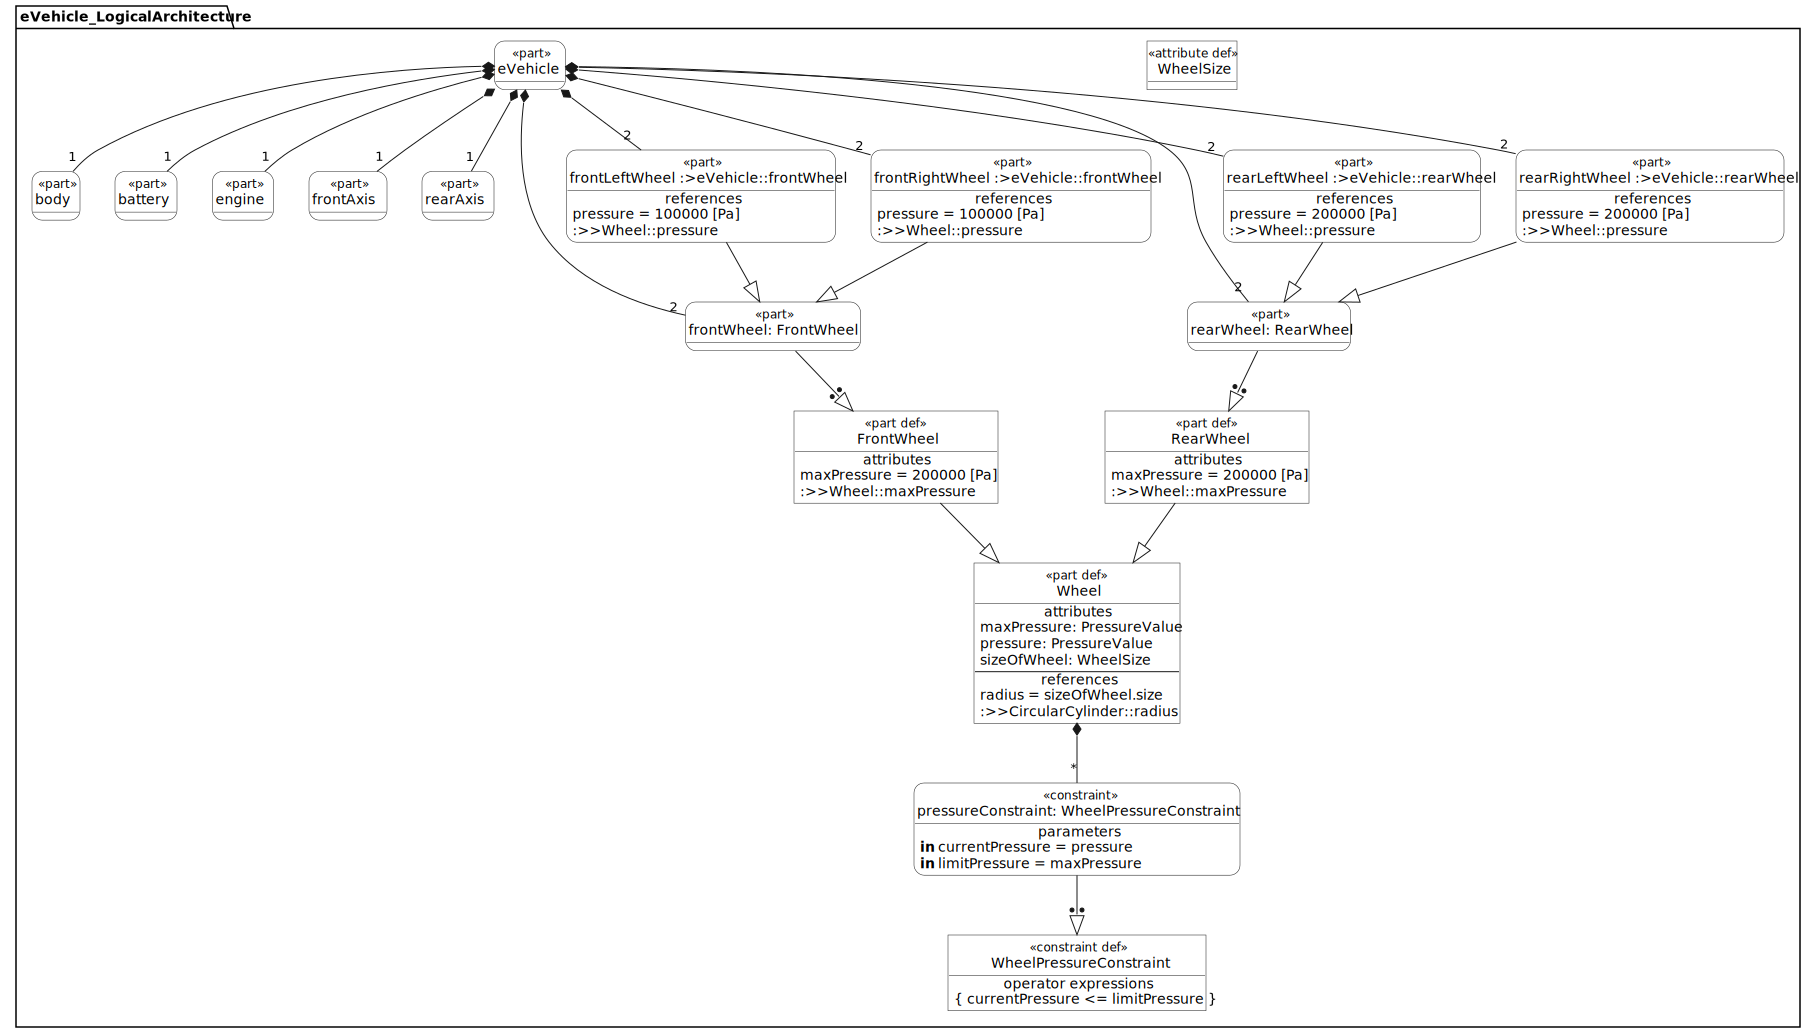

In [8]:
%viz --view=tree eVehicle_LogicalArchitecture
